# Pharmaceuticles, Inc.
*Showing the effects of drugs on tumors in mice*


In [39]:
#Reading in the data, making dataframes and displaying them

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Reading the Resource data, two .csv files...
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

#...one .csv file is a list of Mice by an id code and the drug they were on.
MouseDrugData = pd.read_csv(mouse_drug_data)
MouseDrugDF = pd.DataFrame(MouseDrugData)
MouseDrugDF.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [38]:
#Reading the .csv file with the clinical trial data
ClinicalTrialData = pd.read_csv(clinical_trial_data)
ClinicalTrialDF = pd.DataFrame(ClinicalTrialData)
ClinicalTrialDF.head()

In [3]:
#Mergine the two files on the Mouse ID
MouseDrugDataMerge = pd.merge(MouseDrugDF,ClinicalTrialDF,on=["Mouse ID","Mouse ID"])
MouseDrugDataMerge.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
#Running a test ["xx"] to find the rolling standard error of the Tumor Vol. measurements
xx = MouseDrugDataMerge["Tumor Volume (mm3)"].rolling(len(MouseDrugDataMerge),min_periods=2).std()
xx.head()

0         NaN
1    1.635885
2    1.534949
3    1.602075
4    2.219746
Name: Tumor Volume (mm3), dtype: float64

In [5]:
#An intermediary dataframe grouped by Drug and Timepoint with the Tumor Volume. 
#Metastatic Sites measurements are eliminated for this purpose.
TumorResponseDF = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
TumorResponseDF.drop(columns = "Metastatic Sites",inplace=True)
TumorResponseDF.reset_index(inplace=True)
TumorResponseDF.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
#An intermediary dataframe grouped by Drug and Timepoint with the Metastatic Sites. 
#Tumor Volume measurements are eliminated for this purpose.
MetastaticDF = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MetastaticDF.drop(columns = "Tumor Volume (mm3)",inplace=True)
MetastaticDF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
#I used .pivot to create a table of the Tumor Volumes indexed by Timpoint and Drug.
#Extra Note: I used .pivot on the Pandas homework but did not include it on the final submission.
#On that one I used formulas to create the columns and structured a {dictionary} 
#with the all the combined data to make the table. 
MouseDrugDataGroupby = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MouseDrugDataGroupby.reset_index(inplace=True)
MouseDrugDataMergePivot = MouseDrugDataGroupby.pivot("Timepoint","Drug","Tumor Volume (mm3)")
MouseDrugDataMergePivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
#Creating the data for the error bars for the Tumor Volume plot
#Step 1: Filtering the above .pivot table for the three relevant drugs and placebo
MouseDrugDataGroupby = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MouseDrugDataGroupby.reset_index(inplace=True)
MouseDrugDataMergePivot = MouseDrugDataGroupby.pivot("Timepoint","Drug","Tumor Volume (mm3)")
MouseDrugDataMergePivot
MouseDrugDataMergePivot.drop(columns = ["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"],inplace=True)
MouseDrugDataMergePivot

#Making variables for the rolling standard deviation of the Volume. 
Capo_std  = MouseDrugDataMergePivot["Capomulin"].rolling(len(MouseDrugDataMergePivot),min_periods=2).std()
Infu_std = MouseDrugDataMergePivot["Infubinol"].rolling(len(MouseDrugDataMergePivot),min_periods=2).std()
Keta_std = MouseDrugDataMergePivot["Ketapril"].rolling(len(MouseDrugDataMergePivot),min_periods=2).std()
Placebo_std = MouseDrugDataMergePivot["Placebo"].rolling(len(MouseDrugDataMergePivot),min_periods=2).std()

#Adding columns of the standard deviation ["_.std"] to the df
MouseDrugDataMergePivot["Capo_std"] = Capo_std
MouseDrugDataMergePivot["Infu_std"] = Infu_std
MouseDrugDataMergePivot["Keta_std"] = Keta_std
MouseDrugDataMergePivot["Placebo_std"] = Placebo_std

#Making variables for the standard error of rolling standard deviation
Capo_SE = Capo_std / np.sqrt(len(MouseDrugDataMergePivot))
Infu_SE = Infu_std / np.sqrt(len(MouseDrugDataMergePivot))
Keta_SE = Keta_std / np.sqrt(len(MouseDrugDataMergePivot))
Placebo_SE = Placebo_std / np.sqrt(len(MouseDrugDataMergePivot))

#Adding columns of the standard error["_SE"] to the df
MouseDrugDataMergePivot["Capo_SE"] = Capo_SE
MouseDrugDataMergePivot["Infu_SE"] = Infu_SE
MouseDrugDataMergePivot["Keta_Se"] = Keta_SE
MouseDrugDataMergePivot["Placebo_SE"] = Placebo_SE

#Final version of the Tumor Volume df with standard deviation and standard error included
MouseDrugDataMergePivot

Drug,Capomulin,Infubinol,Ketapril,Placebo,Capo_std,Infu_std,Keta_std,Placebo_std,Capo_SE,Infu_SE,Keta_Se,Placebo_SE
Timepoint,,,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44.266086,47.062001,47.389175,47.125589,0.518955,1.458055,1.689402,1.503019,0.164108,0.461077,0.534236,0.475296
10,43.084291,49.403909,49.582269,49.423329,0.966541,2.203436,2.291834,2.212223,0.305647,0.696788,0.724741,0.699566
15,42.064317,51.296397,52.399974,51.359742,1.294591,2.742976,3.153334,2.761154,0.409385,0.867405,0.997172,0.873153
20,40.716325,53.197691,54.920935,54.364417,1.710067,3.264533,3.932754,3.640213,0.540771,1.032336,1.243646,1.151136
25,39.939528,55.715252,57.678982,57.482574,1.981765,3.951946,4.750436,4.619770,0.626689,1.249715,1.502220,1.460899
30,38.769339,58.299397,60.994507,59.809063,2.296441,4.712108,5.711131,5.422085,0.726198,1.490099,1.806018,1.714614
35,37.816839,60.742461,63.371686,62.420615,2.585297,5.466623,6.523137,6.209947,0.817543,1.728698,2.062797,1.963758
40,36.958001,63.162824,66.068580,65.052675,2.845590,6.210462,7.323842,6.992838,0.899855,1.963920,2.316002,2.211330


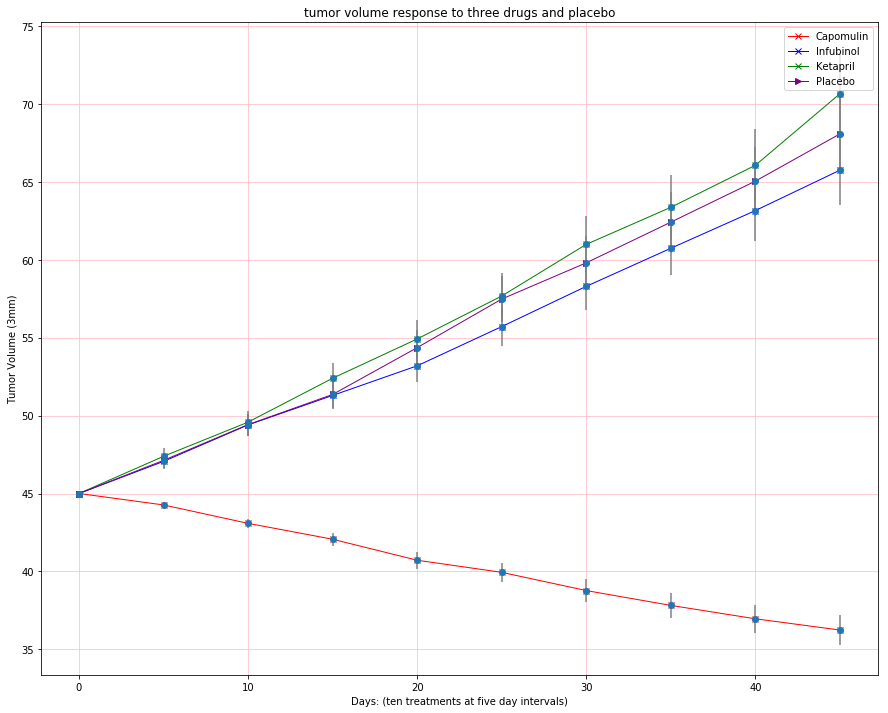

In [9]:
#Using MatPlotLib to plot the size of the tumors for three drugs and placebo based on above DataFrame

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Nice big, legible size of the chart
plt.figure(figsize=(15,12))

#Using Numby to create array for x_axis
#Designating variables for y_axes based on DataFrame Tumor Volume numbers by Drug (and placebo)
x_axis = np.arange(0,50,5)
Capomulin = MouseDrugDataMergePivot["Capomulin"]
Infubinol = MouseDrugDataMergePivot["Infubinol"]
Ketapril = MouseDrugDataMergePivot["Ketapril"]
Placebo = MouseDrugDataMergePivot["Placebo"]

#Creating plot and specs for each marker and line
CapomulinP, = plt.plot(x_axis, Capomulin, alpha=1, marker="x",color="red", linewidth=1, label="Capomulin")
InfubinolP, = plt.plot(x_axis, Infubinol, color="blue", alpha=1, marker="x", linewidth=1, label="Infubinol")
KetaprilP, = plt.plot(x_axis, Ketapril, color="green", alpha=1, marker="x", linewidth=1, label="Ketapril")
PlaceboP, = plt.plot(x_axis, Placebo, color="purple", alpha=1, marker=">", linewidth=1, label="Placebo") 

#Setting grid color, title, labels and legend
plt.grid(color='pink')
plt.legend(handles=[CapomulinP,InfubinolP,KetaprilP,PlaceboP], loc="best")
plt.title("tumor volume response to three drugs and placebo")
plt.xlabel("Days: (ten treatments at five day intervals)")
plt.ylabel("Tumor Volume (3mm)")

#Creating errorbars using ["_SE"] values from above df
plt.errorbar(x_axis, Capomulin, Capo_SE,  fmt="o",ecolor='grey')
plt.errorbar(x_axis, Infubinol, Infu_SE,  fmt="o",ecolor='grey')
plt.errorbar(x_axis, Ketapril, Keta_SE,  fmt="o",ecolor='grey')
plt.errorbar(x_axis, Placebo, Placebo_SE,  fmt="o",ecolor='grey')

plt.show()

This plot illustrates that one drug - Capomulin - reduced the size of the tumors while the other two are roughly on par with the placebo with wich all the tumors grew.

In [10]:
#Creating DataFrame with .pivot for Metastatic Sites by Timepoint and drug (including placebo)
MetastaticDF = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MetastaticDF.reset_index(inplace=True)
MetastaticDFPivot = MetastaticDF.pivot("Timepoint","Drug","Metastatic Sites")
MetastaticDFPivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
#Creating the data for the error bars for the Metasatic Sites plot
#Step 1: Filtering the above .pivot table for the three relevant drugs and placebo
MetastaticDF = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MetastaticDF.reset_index(inplace=True)
MetastaticDFPivot = MetastaticDF.pivot("Timepoint","Drug","Metastatic Sites")
MetastaticDFPivot

#Eliminating the drugs not required on the charts in order to create room for statistical data
MetastaticDFPivot.drop(columns = ["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"],inplace=True)
MetastaticDFPivot

#Making variables for the rolling standard deviation of the Metastasis. 
Capo_std_M  = MetastaticDFPivot["Capomulin"].rolling(len(MetastaticDFPivot),min_periods=2).std()
Infu_std_M = MetastaticDFPivot["Infubinol"].rolling(len(MetastaticDFPivot),min_periods=2).std()
Keta_std_M = MetastaticDFPivot["Ketapril"].rolling(len(MetastaticDFPivot),min_periods=2).std()
Placebo_std_M = MetastaticDFPivot["Placebo"].rolling(len(MetastaticDFPivot),min_periods=2).std()

#Adding columns of the standard deviation ["_.std"] to the df
MetastaticDFPivot["Capo_std_M"] = Capo_std_M
MetastaticDFPivot["Infu_std_M"] = Infu_std_M
MetastaticDFPivot["Keta_std_M"] = Keta_std_M
MetastaticDFPivot["Placebo_std_M"] = Placebo_std_M

#Making variables for the standard error of rolling standard deviation
Capo_SE_M = Capo_std_M / np.sqrt(len(MetastaticDFPivot))
Infu_SE_M = Infu_std_M / np.sqrt(len(MetastaticDFPivot))
Keta_SE_M = Keta_std_M / np.sqrt(len(MetastaticDFPivot))
Placebo_SE_M = Placebo_std_M / np.sqrt(len(MetastaticDFPivot))

#Adding columns of the standard error["_SE"] to the df
MetastaticDFPivot["Capo_SE_M"] = Capo_SE_M
MetastaticDFPivot["Infu_SE_M"] = Infu_SE_M
MetastaticDFPivot["Keta_Se_M"] = Keta_SE_M
MetastaticDFPivot["Placebo_SE_M"] = Placebo_SE_M

# # # MouseDrugDataMergeMetaPivot.fillna(0,inplace=True)
# # #Final version of the Tumor Volume df with standard deviation and standard error included
MetastaticDFPivot


Drug,Capomulin,Infubinol,Ketapril,Placebo,Capo_std_M,Infu_std_M,Keta_std_M,Placebo_std_M,Capo_SE_M,Infu_SE_M,Keta_Se_M,Placebo_SE_M
Timepoint,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.160000,0.280000,0.304348,0.375000,0.113137,0.197990,0.215206,0.265165,0.035777,0.062610,0.068054,0.083853
10,0.320000,0.666667,0.590909,0.833333,0.160000,0.334753,0.295499,0.417361,0.050596,0.105858,0.093445,0.131981
15,0.375000,0.904762,0.842105,1.250000,0.169183,0.401867,0.363472,0.543666,0.053500,0.127082,0.114940,0.171922
20,0.652174,1.050000,1.210526,1.526316,0.244766,0.435970,0.468590,0.622841,0.077402,0.137866,0.148181,0.196960
25,0.818182,1.277778,1.631579,1.941176,0.304028,0.482844,0.597179,0.727022,0.096142,0.152689,0.188845,0.229905
30,1.090909,1.588235,2.055556,2.266667,0.384316,0.554862,0.731961,0.821079,0.121531,0.175463,0.231466,0.259648
35,1.181818,1.666667,2.294118,2.642857,0.432164,0.593859,0.828118,0.921354,0.136662,0.187795,0.261874,0.291358
40,1.380952,2.100000,2.733333,3.166667,0.485423,0.678879,0.943741,1.052472,0.153504,0.214680,0.298437,0.332821


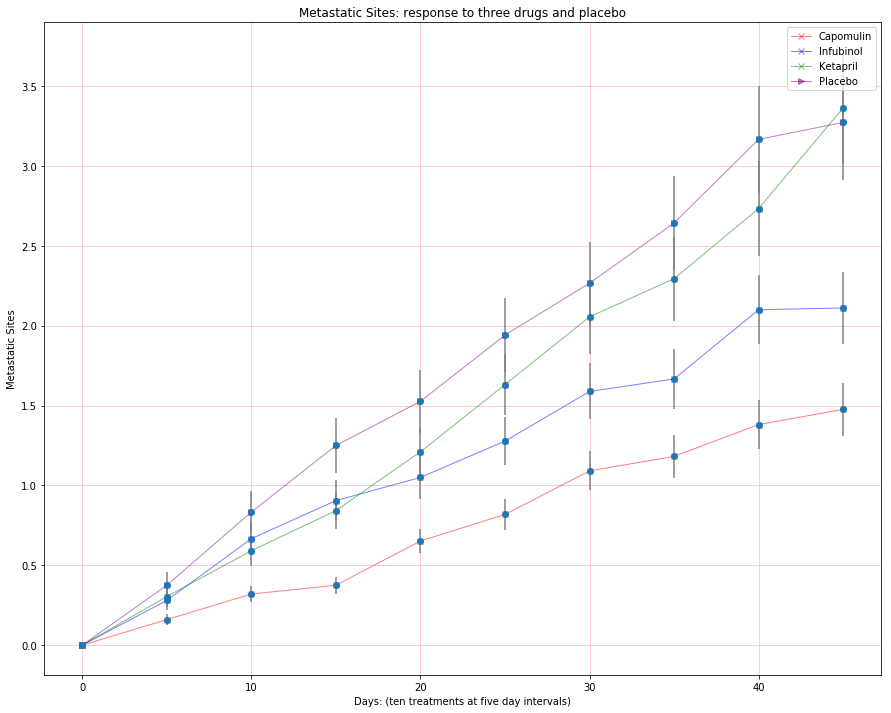

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
from scipy import stats
%matplotlib inline

#Sizing the plot so it's legible
plt.figure(figsize=(15,12))

#Making x axis
x_axis = np.arange(0,50,5)

#Setting variable for y axis plots
Capomulin_M = MetastaticDFPivot["Capomulin"]
Infubinol_M = MetastaticDFPivot["Infubinol"]
Ketapril_M = MetastaticDFPivot["Ketapril"]
Placebo_M = MetastaticDFPivot["Placebo"]

#Plotting four drugs based on df
Capomulin_MP, = plt.plot(x_axis, Capomulin_M, alpha=0.5, marker="x",color="red", linewidth=1, label="Capomulin")
Infubinol_MP, = plt.plot(x_axis, Infubinol_M, color="blue", alpha=0.5, marker="x", linewidth=1, label="Infubinol")
Ketapril_MP, = plt.plot(x_axis, Ketapril_M, color="green", alpha=0.5, marker="x", linewidth=1, label="Ketapril")
Placebo_MP, = plt.plot(x_axis, Placebo_M, color="purple", alpha=0.5, marker=">", linewidth=1, label="Placebo") 

#Plot aesthetics
plt.grid(color='pink')
plt.legend(handles=[Capomulin_MP,Infubinol_MP,Ketapril_MP,Placebo_MP], loc="best")
plt.title("Metastatic Sites: response to three drugs and placebo")
plt.xlabel("Days: (ten treatments at five day intervals)")
plt.ylabel("Metastatic Sites")

#Creating errorbars using ["_SE"] values from above df
plt.errorbar(x=x_axis, y=Capomulin_M, yerr=Capo_SE_M,  fmt="o",ecolor='grey')
plt.errorbar(x_axis, Infubinol_M, Infu_SE_M,  fmt="o",ecolor='grey')
plt.errorbar(x_axis, Ketapril_M, Keta_SE_M,  fmt="o",ecolor='grey')
plt.errorbar(x_axis,Placebo_M, Placebo_SE_M, fmt="o",ecolor="grey")

plt.show()

This plot shows that, again, Capomulin performed the best, but it also shows that Infubinol performed notably better than the Placebo at, I believe, slowing the natural metastatic growth of the cancer. 

In [27]:
#DataFrame using groupby, pivot and count to show numbers of surviving mice (Mouse ID) per drug and as Timpoint advanced

SurvivorMergeGroup = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).count()
SurvivorMergeGroup.reset_index(inplace=True)
SurvivorPivot = SurvivorMergeGroup.pivot("Timepoint","Drug","Mouse ID")
SurvivorPivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


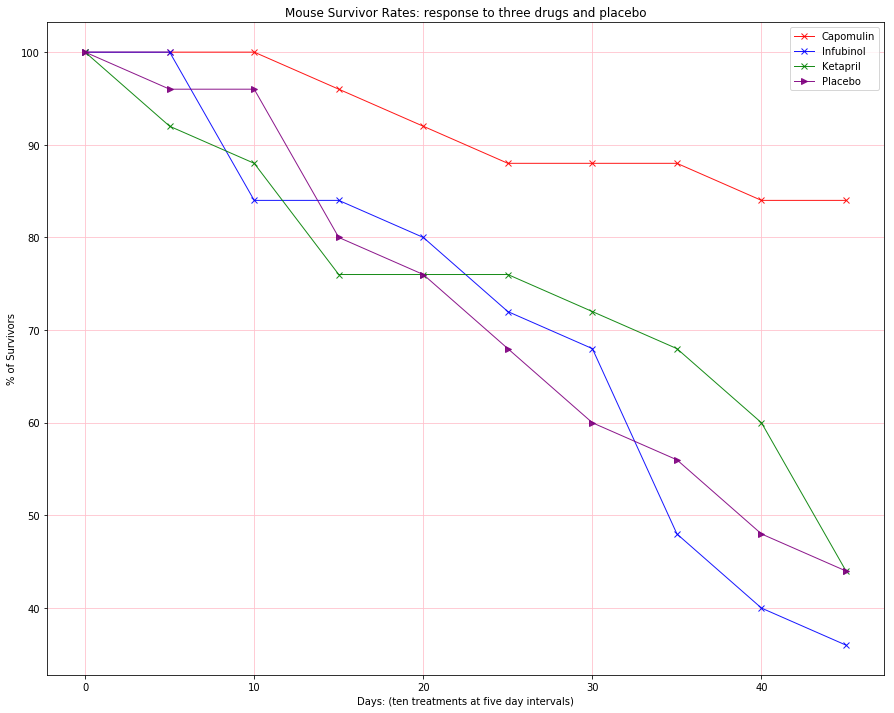

In [40]:
#This chart shows the progress of survivors for the relevant three drugs and placebo

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#How big the plot is
plt.figure(figsize=(15,12))

#Delineating x axis
x_axis = np.arange(0,50,5)

#Setting variables for the points and lines of the y axis
Capomulin = SurvivorPivot["Capomulin"]*4
Infubinol = SurvivorPivot["Infubinol"]*4
Ketapril = SurvivorPivot["Ketapril"]*4
Placebo = SurvivorPivot["Placebo"]*4

#Drawing the four lines
Capomulin, = plt.plot(x_axis, Capomulin, alpha=0.9, marker="x",color="red", linewidth=1, label="Capomulin")
Infubinol, = plt.plot(x_axis, Infubinol, color="blue", alpha=0.9, marker="x", linewidth=1, label="Infubinol")
Ketapril, = plt.plot(x_axis, Ketapril, color="green", alpha=0.9, marker="x", linewidth=1, label="Ketapril")
Placebo, = plt.plot(x_axis, Placebo, color="purple", alpha=0.9, marker=">", linewidth=1, label="Placebo") 

#Plot aesthetics
plt.grid(color='pink')
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.title("Mouse Survivor Rates: response to three drugs and placebo")
plt.xlabel("Days: (ten treatments at five day intervals)")
plt.ylabel("% of Survivors")

plt.show()

In this plot the Capomulin line is above the others illustrating that a significantly greater percentage of mice survived it's course compared to the placebo and two other drugs.

In [35]:
#Creating a bar chart of percent change of survivors per drug

MouseDrugDataGroupby = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MouseDrugDataGroupby.reset_index(inplace=True)
MouseDrugDataMergePivot = MouseDrugDataGroupby.pivot("Timepoint","Drug","Tumor Volume (mm3)")
MouseDrugDataMergePivot

#Calculating the percent change and making a dataframe
PercentChange = (MouseDrugDataMergePivot.iloc[9,:10] - MouseDrugDataMergePivot.iloc[1,:10])/ MouseDrugDataMergePivot.iloc[1,:10]*100
PercentChangeDF = pd.DataFrame(PercentChange)
PercentChangeDF.drop(["Ceftamin","Zoniferol","Naftisol","Propriva","Ramicane","Stelasyn"],inplace=True)
PercentChangeDF

,0
Drug,
Capomulin,-18.140236
Infubinol,39.721136
Ketapril,49.112025
Placebo,44.473700


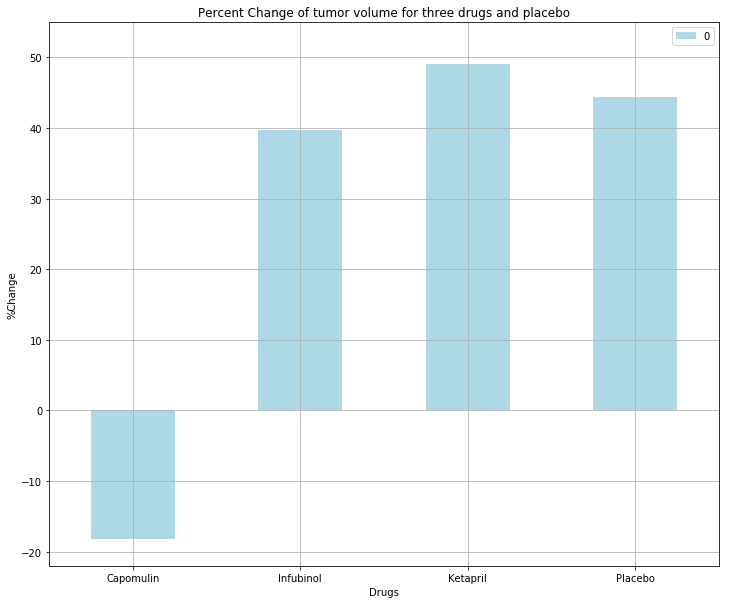

In [34]:
#Plotting the percent change dataframe on a bar chart
PercentChangeDF.plot(kind="bar", figsize=(12,10),rot=0,facecolor="lightblue", alpha=1,)
plt.ylim(-22,55)
plt.grid()
plt.title("Percent Change of tumor volume for three drugs and placebo")
plt.xlabel("Drugs")
plt.ylabel("%Change")

plt.show()

A clear illustration that Capomulin took the tumor size in the opposite direction than the other drugs and placebo